In [1]:
import numpy as np
import datetime as dtm
import netCDF4 as nc
import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

In [2]:
eps1 = np.load('/mnt/storage0/jacquielee/data/eps_ANHA4-EXH004_y2004m09d07.npy')
tracers = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/ANHA4-EXH004_y2004m09d07_gridT.nc')
sal = tracers.variables['vosaline'][0,:,:,:]
depth = tracers.variables['deptht']

eps0 = np.ma.masked_outside(eps1[:,:,:],0,100)

eps00 = np.ma.filled(eps0,fill_value = 10**(-16))
salinity = np.ma.masked_where(sal[:,:,:] == 0,sal)
salmask = (ma.getmaskarray(salinity[:,:]))*1
eps = ma.array(eps00,mask=salmask)

In [3]:
lat = tracers.variables['nav_lat'][:,:]
lon = tracers.variables['nav_lon'][:,:]

In [4]:
nsquare = np.load('/mnt/storage0/jacquielee/data/nsquare_ANHA4-EXH004_y2004m09d07.npy')

In [5]:
#nsquare[nsquare <= 0.0] = 10**(-16)
gamma = 0.2

In [8]:
k_v = ((eps*0.2)/nsquare)+0.00001

In [9]:
for i in np.arange(0,50):
    print(i)
    for j in np.arange(0,800):
        for k in np.arange(0,544):
            if k_v[i,j,k] < -0.0:
                k_v[i,j,k] = 0.00001
            else:
                continue

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
k_v.shape

In [14]:
def make_figure(ax,cmap,depth,eps,grid):

    cmap.set_bad('burlywood')
    mesh = ax.pcolormesh(eps[grid,:,:],norm=colors.LogNorm(vmin=10**(-16), vmax=1000),cmap=cmap)
    cbar = fig.colorbar(mesh,ax=ax)
    cbar.set_label('W/m^2')
    plt.axis((0, eps.shape[2], 0, eps.shape[1]))
    text = ax.set_title('Turbulent Dissipation Rate at {d:.2f} m'.format(d=depth[grid]))
    ax.set_xlabel('x Index')
    ax.set_ylabel('y Index')
    
    plot_ob = {'CONT_OBJ':mesh,'TEXT_OBJ':text}
    
    return plot_ob

In [15]:
def update_figure(grid_ind,depth,ax,cmap,eps,PLOT_OBJS):
#     for C in PLOT_OBJS['CONT_OBJ'].collections:
#         C.remove()
    del(PLOT_OBJS['CONT_OBJ'])
    PLOT_OBJS['CONT_OBJ'] = ax.pcolormesh(eps[grid_ind,:,:],
                                           norm=colors.LogNorm(vmin=10**(-16), vmax=1000),cmap=cmap)
    PLOT_OBJS['TEXT_OBJ'].set_text('Turbulent Dissipation Rate at {d:.2f} m'.format(d=depth[grid_ind]))
    
    return PLOT_OBJS

/home/jacquielee/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


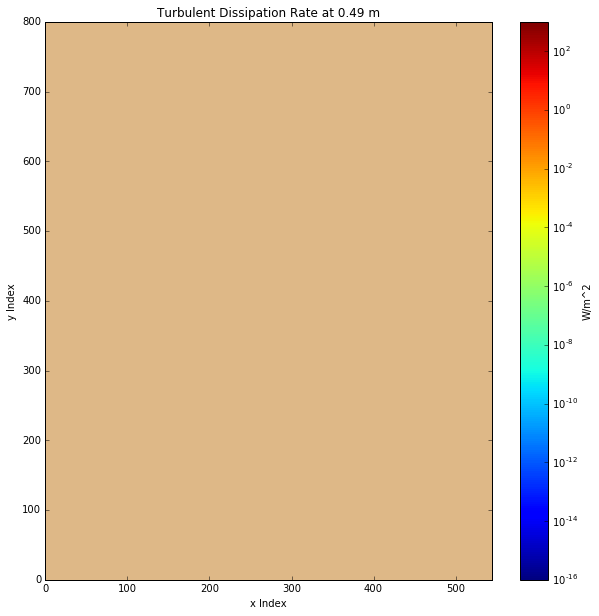

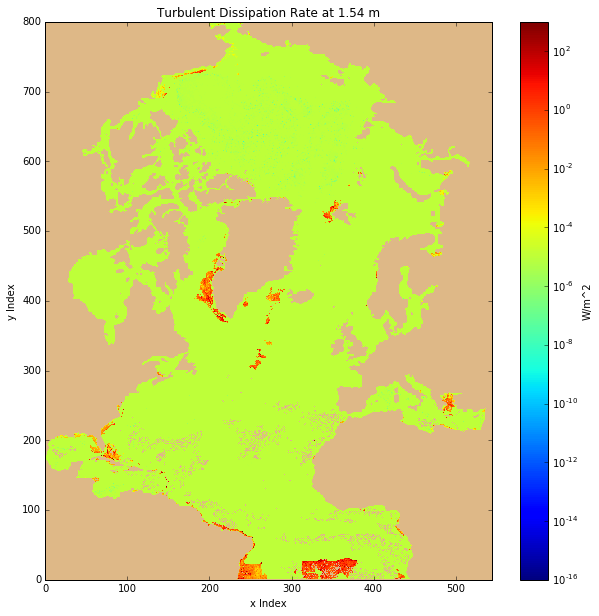

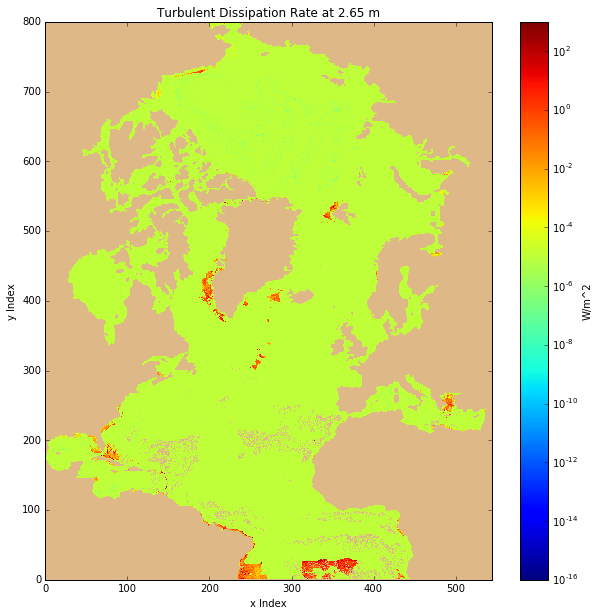

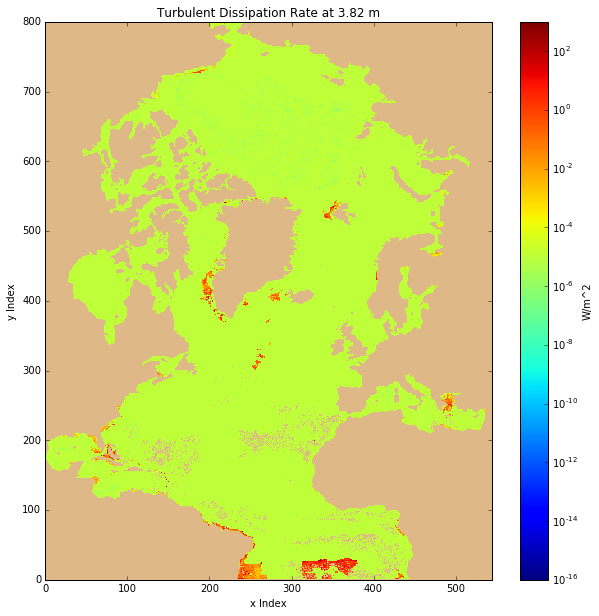

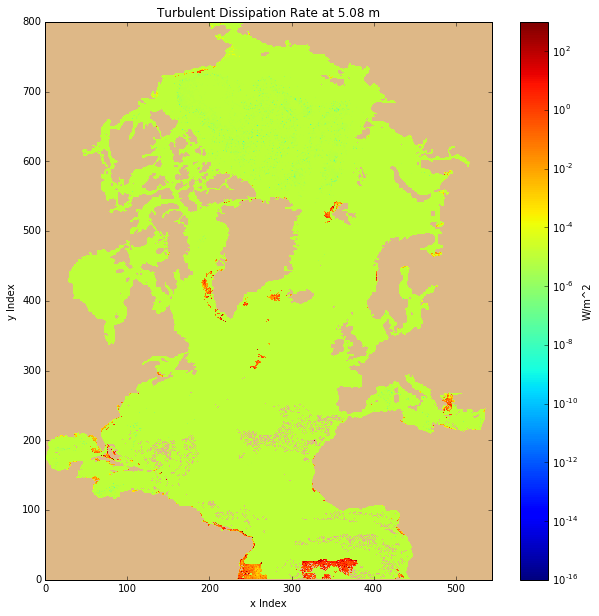

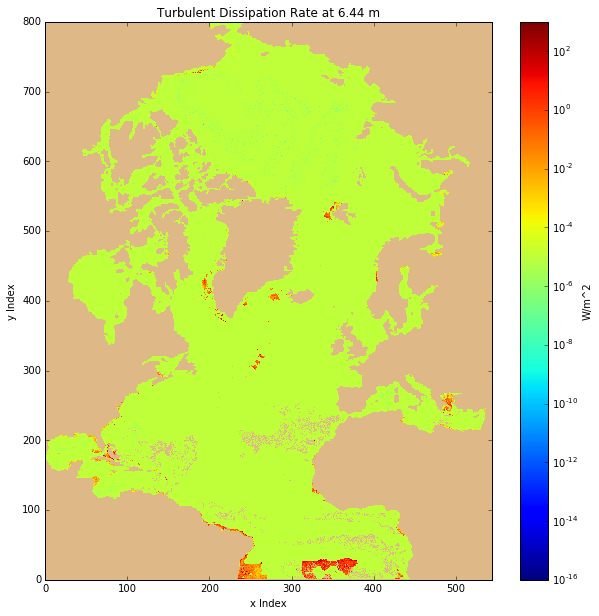

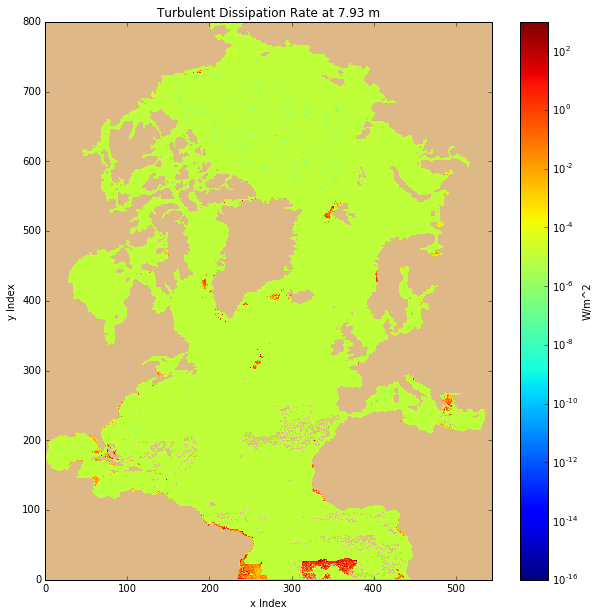

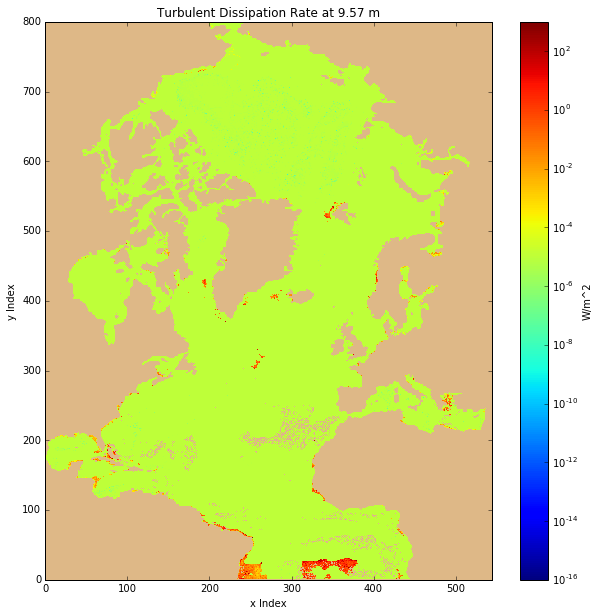

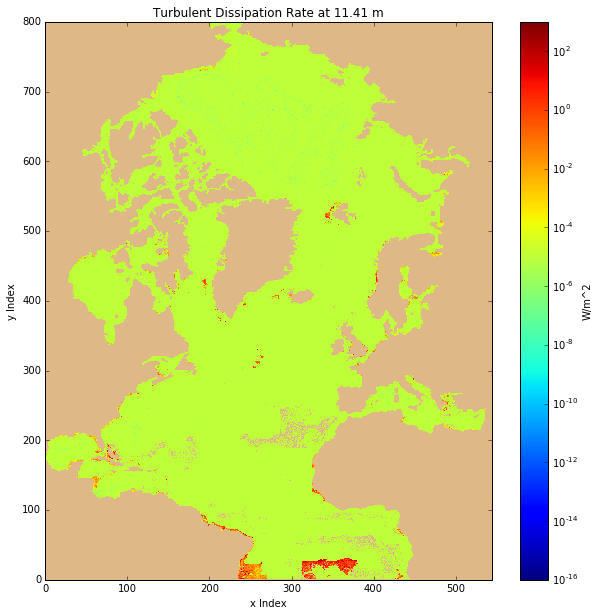

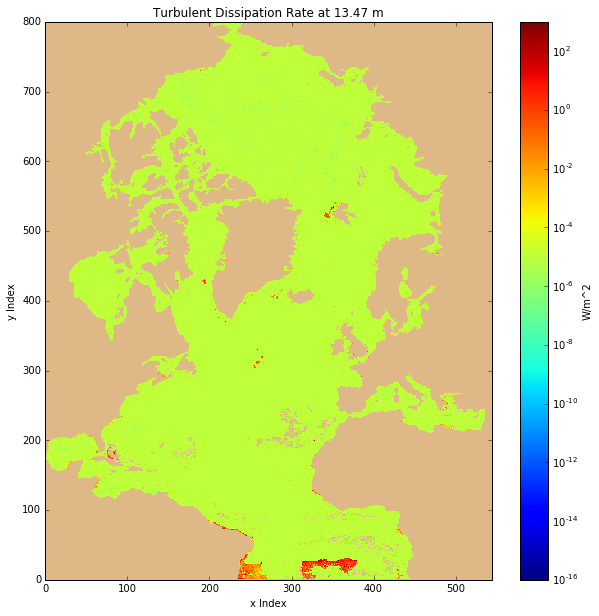

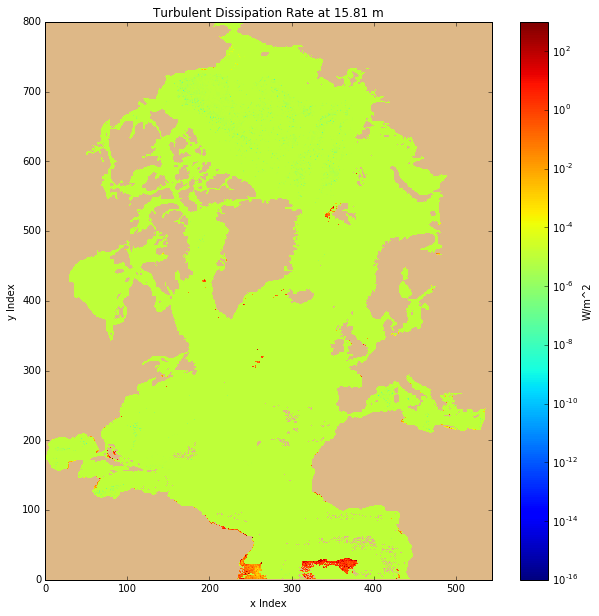

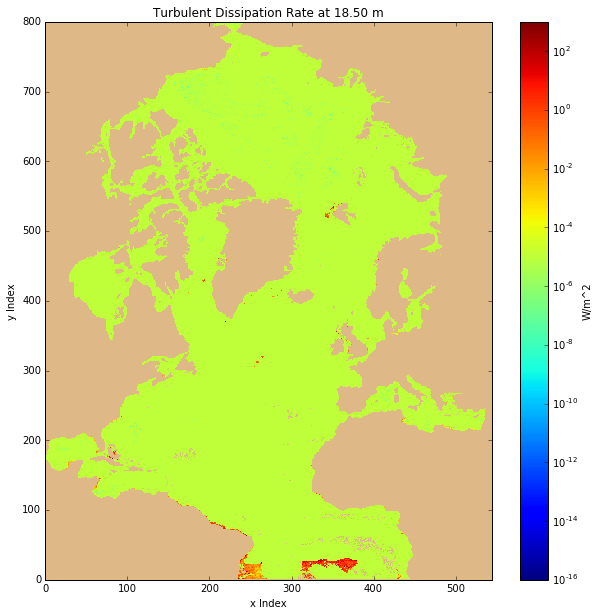

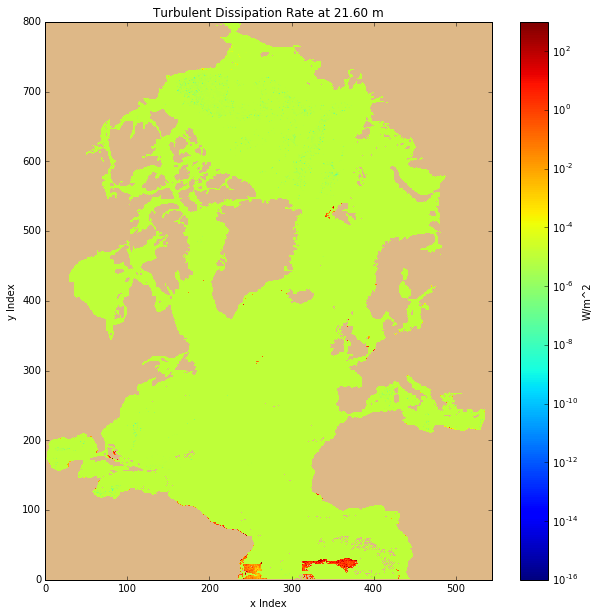

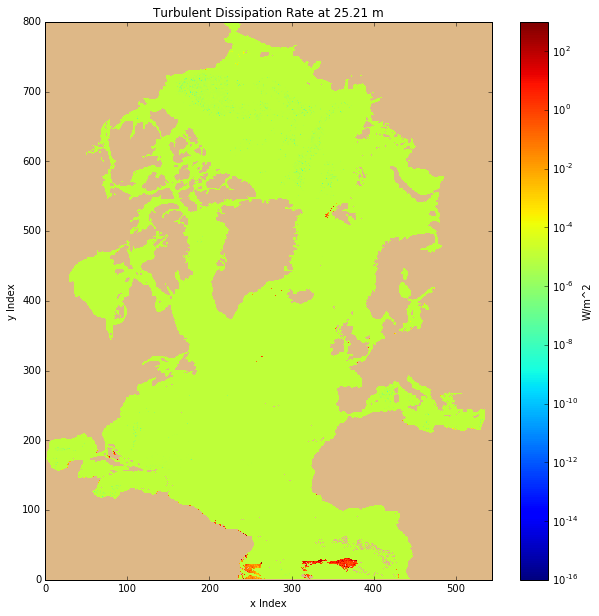

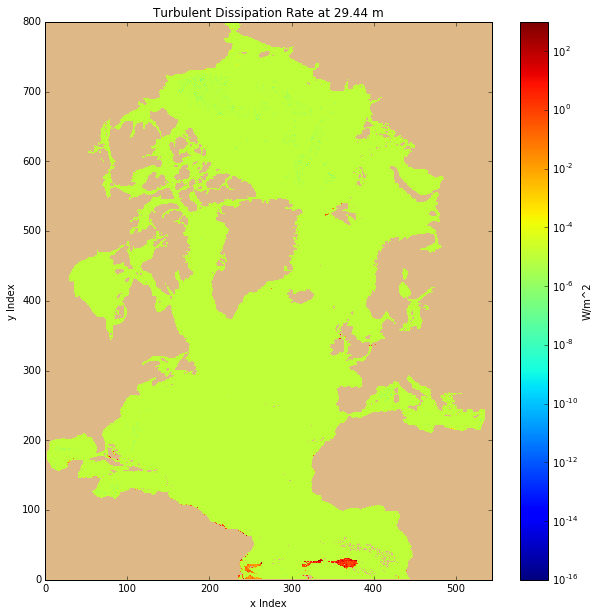

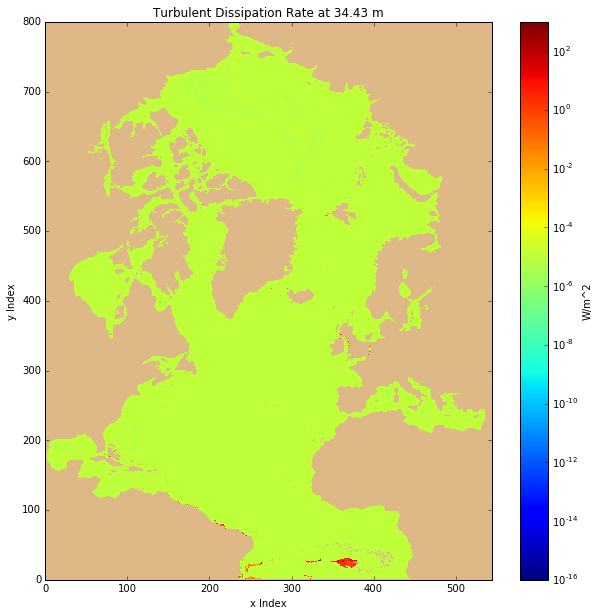

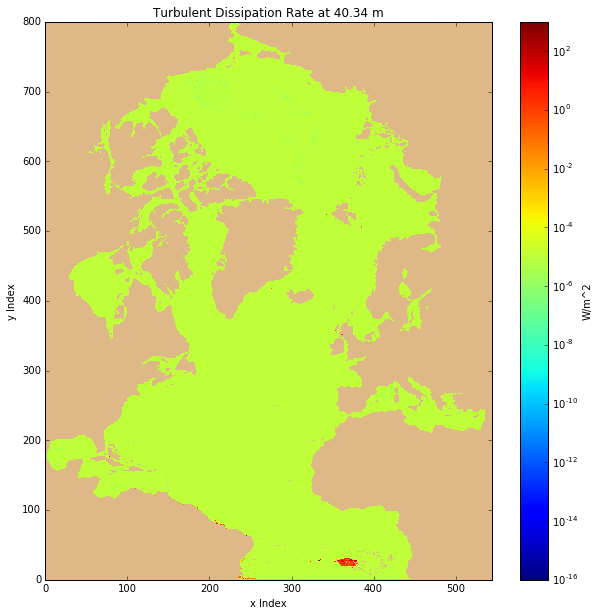

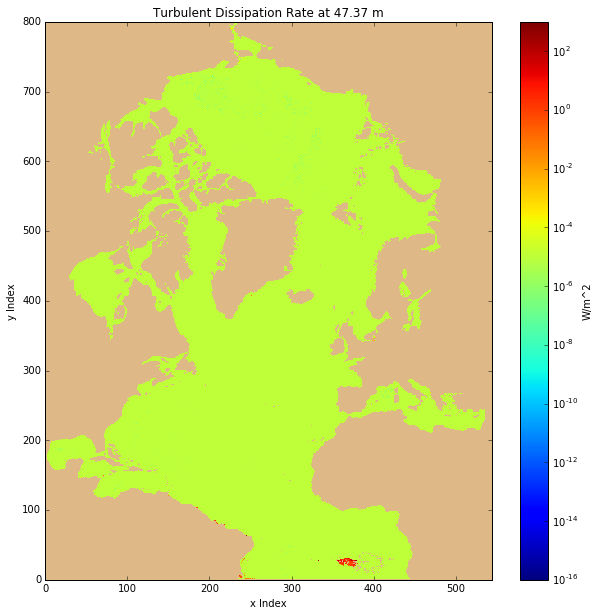

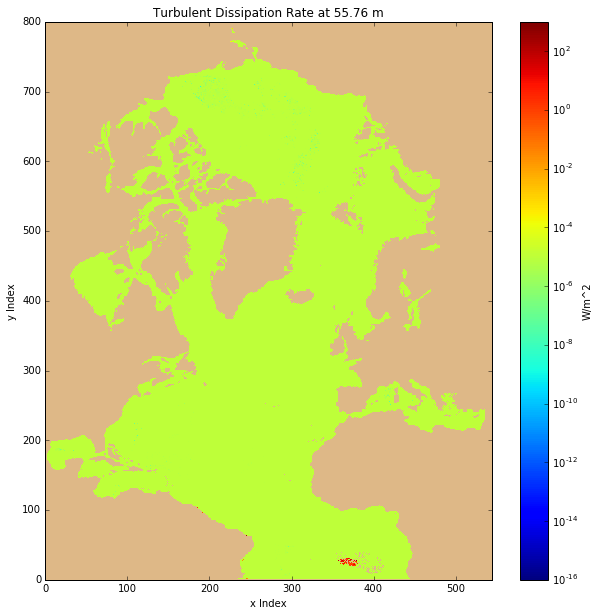

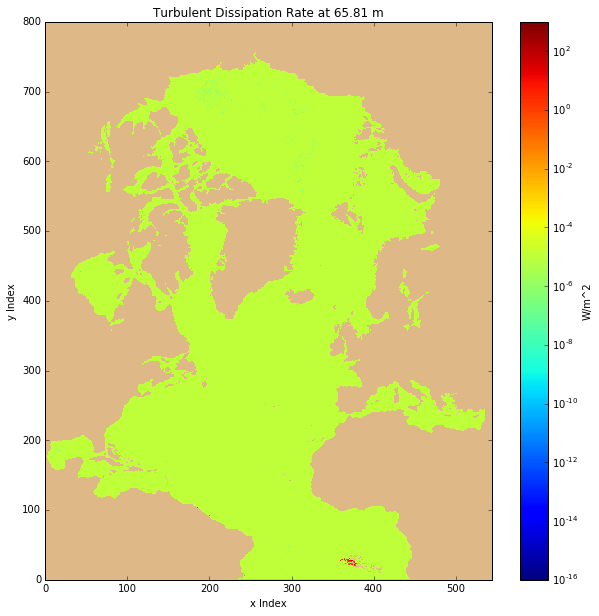

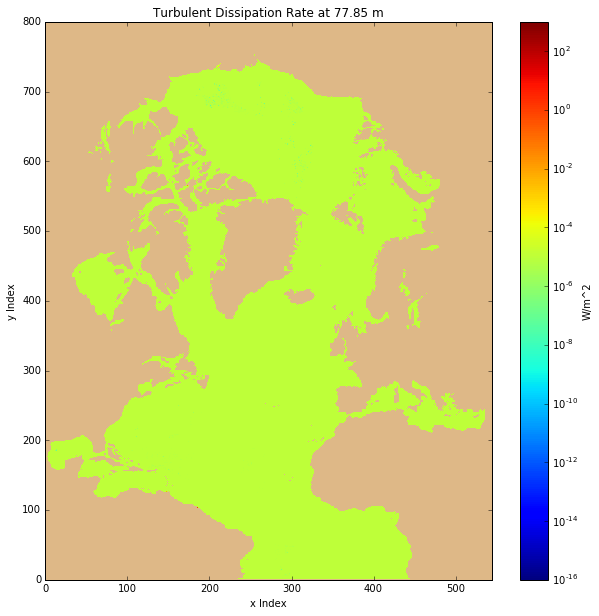

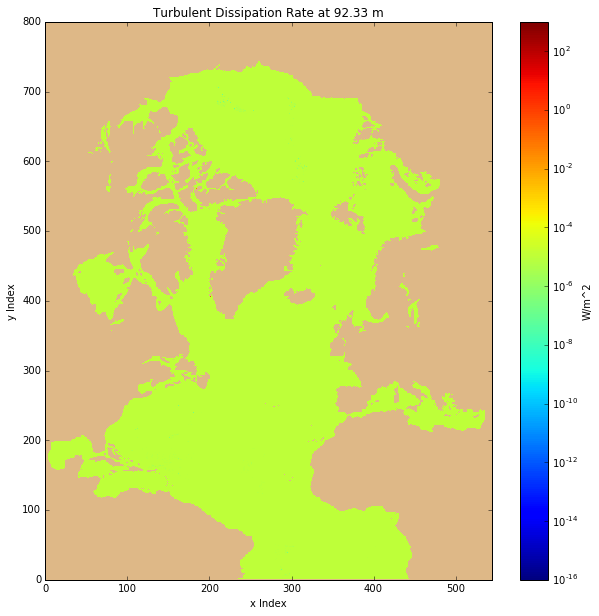

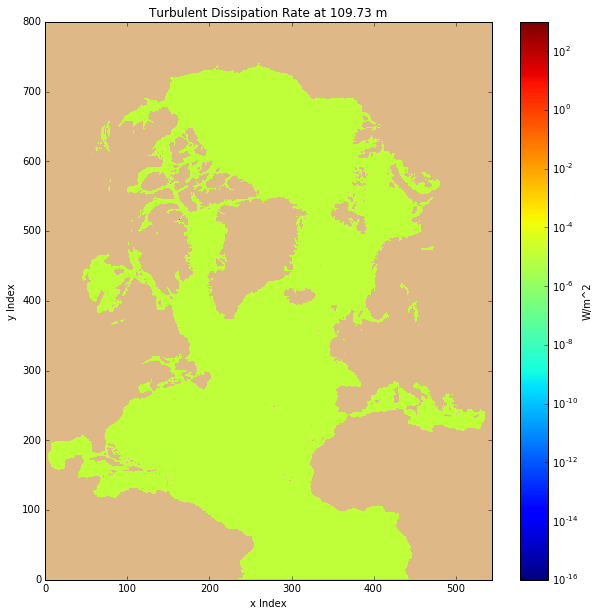

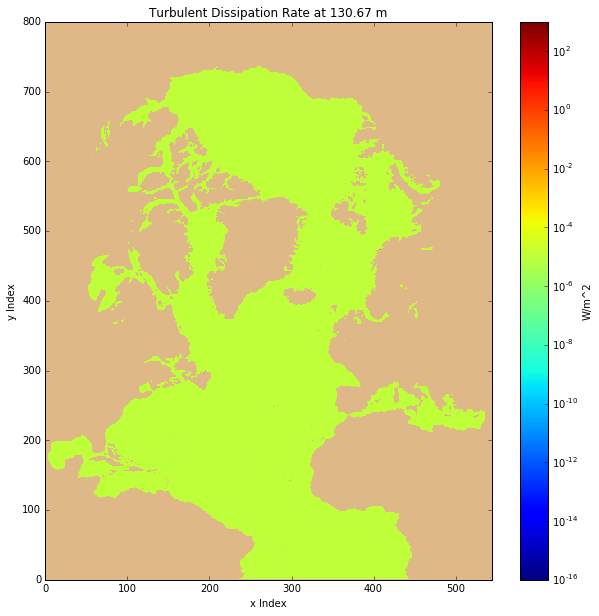

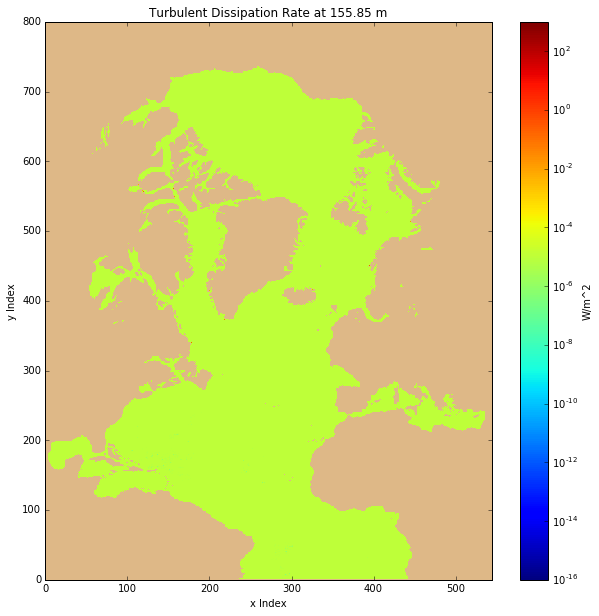

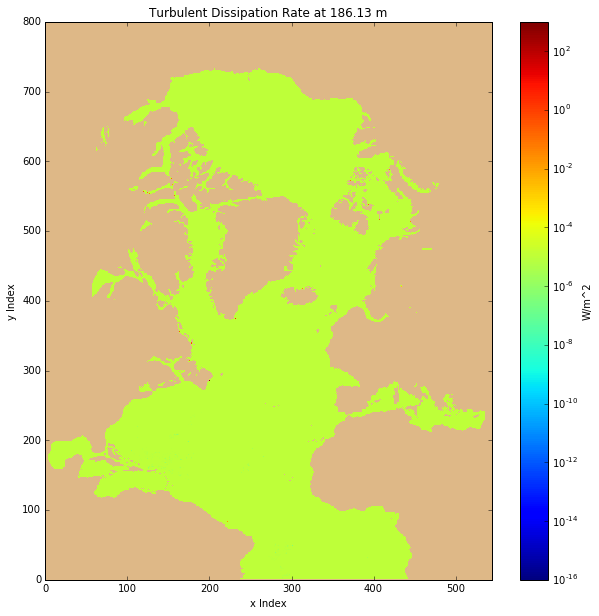

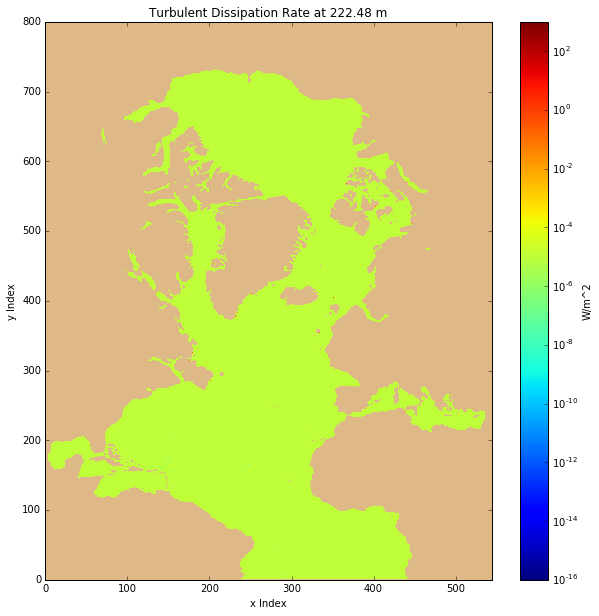

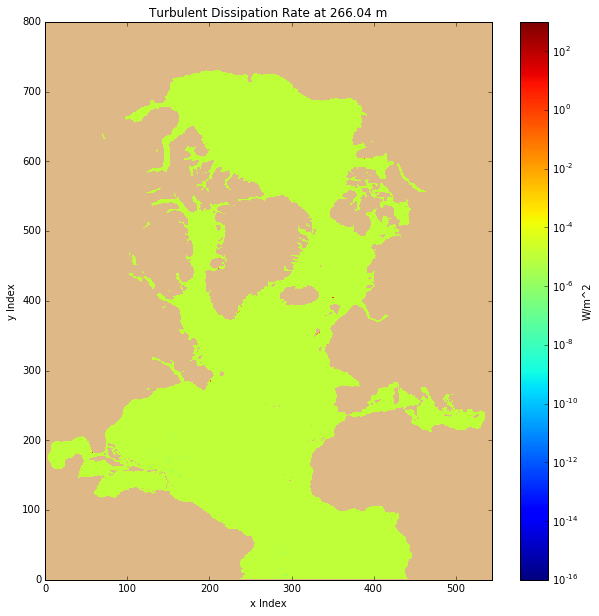

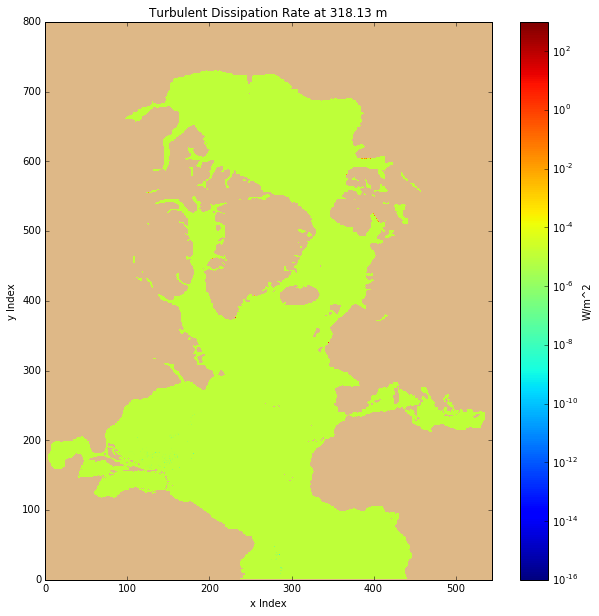

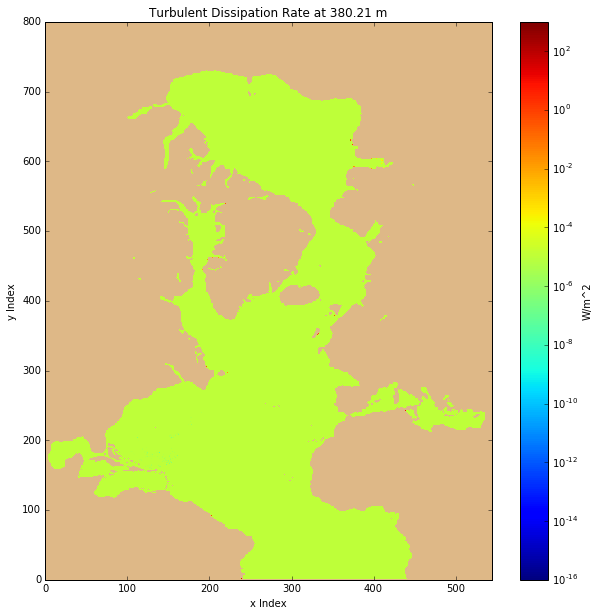

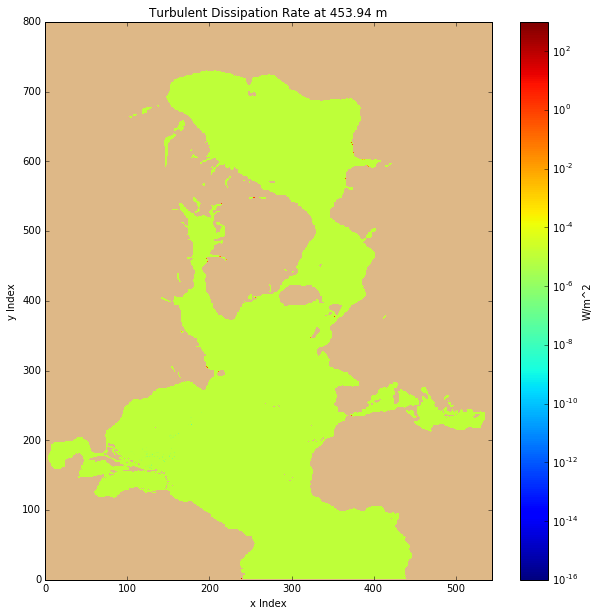

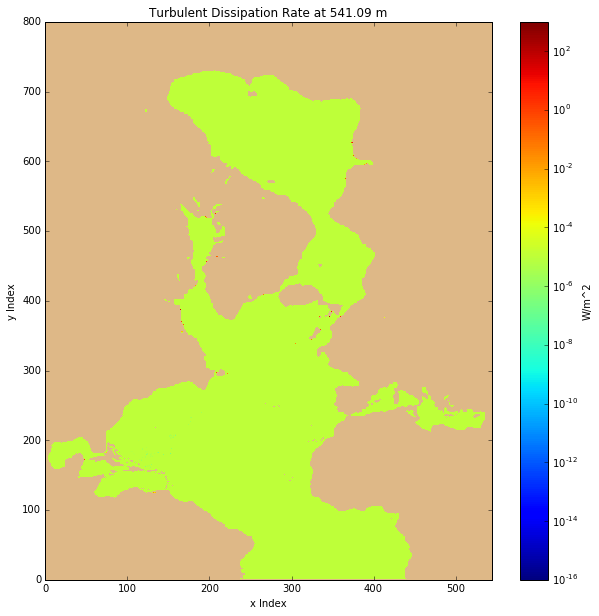

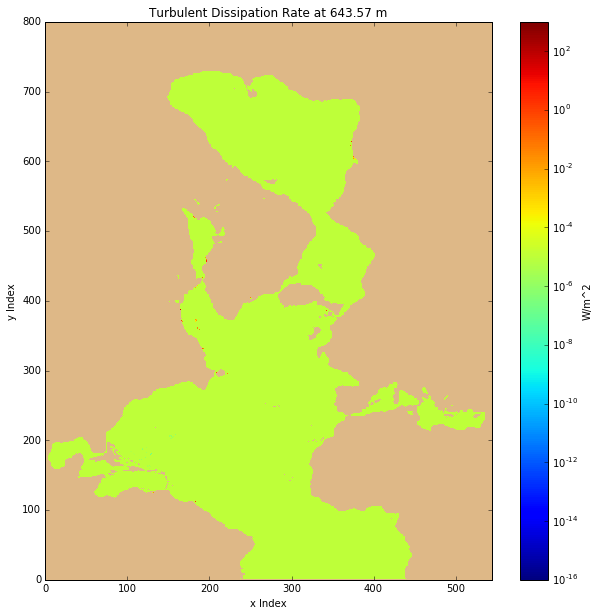

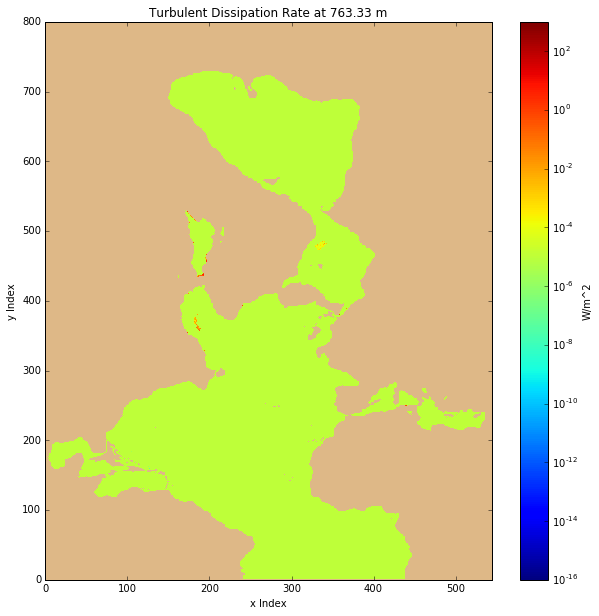

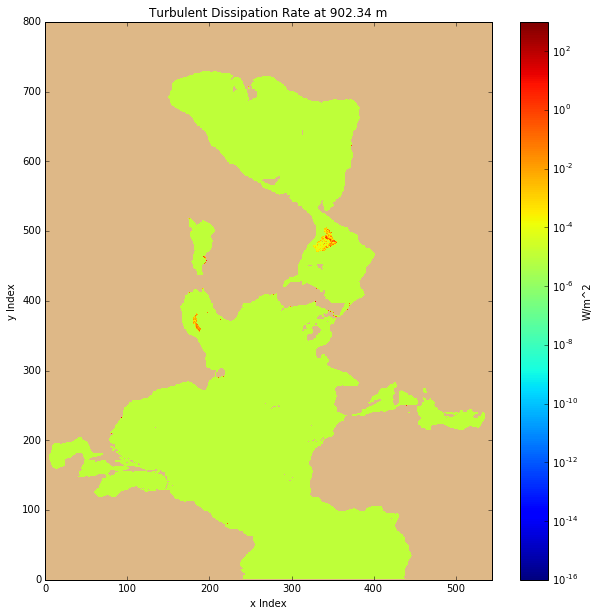

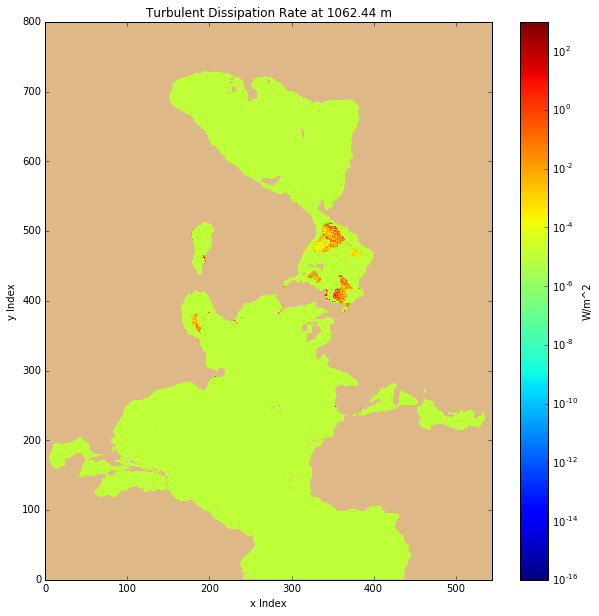

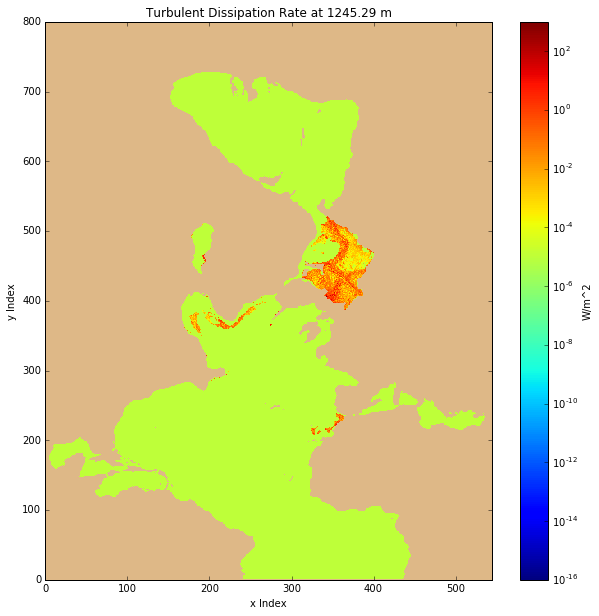

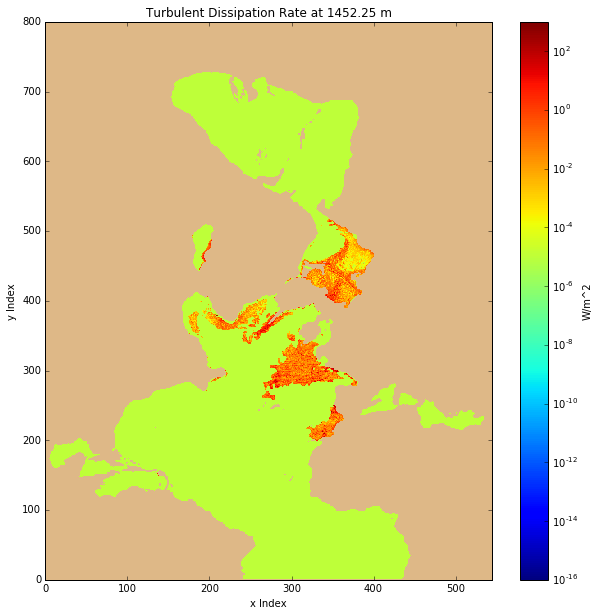

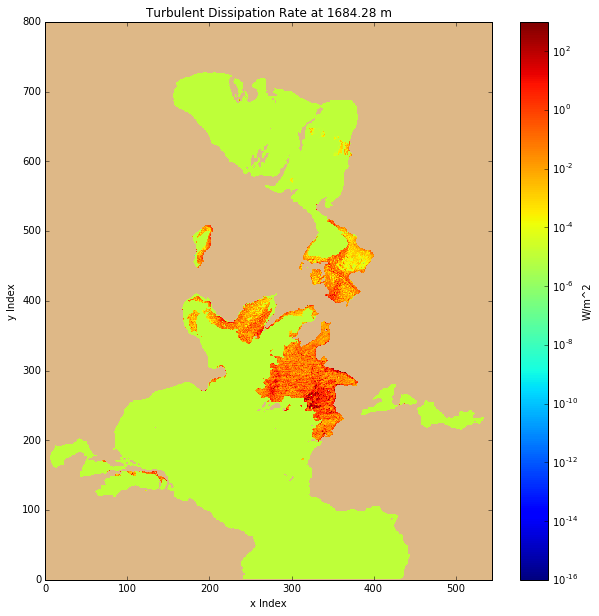

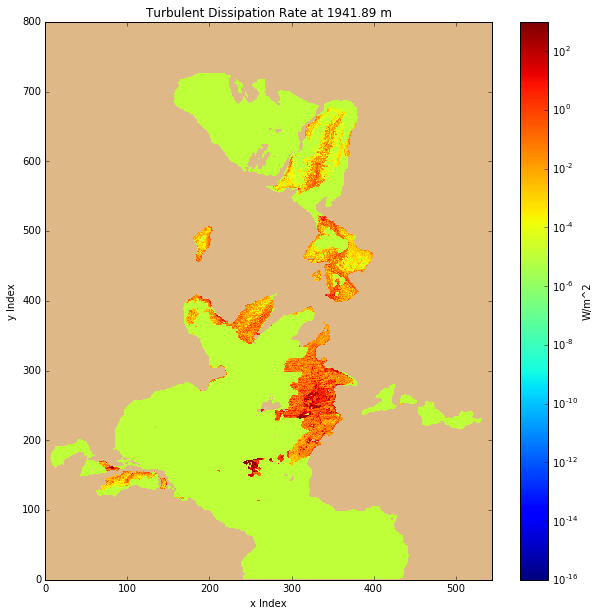

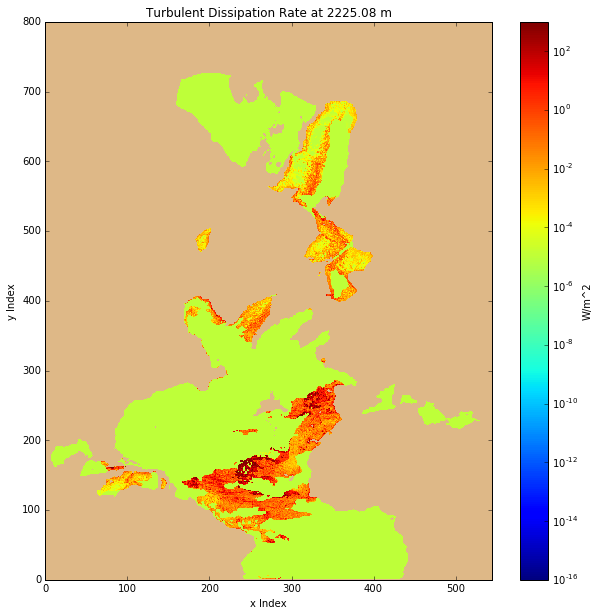

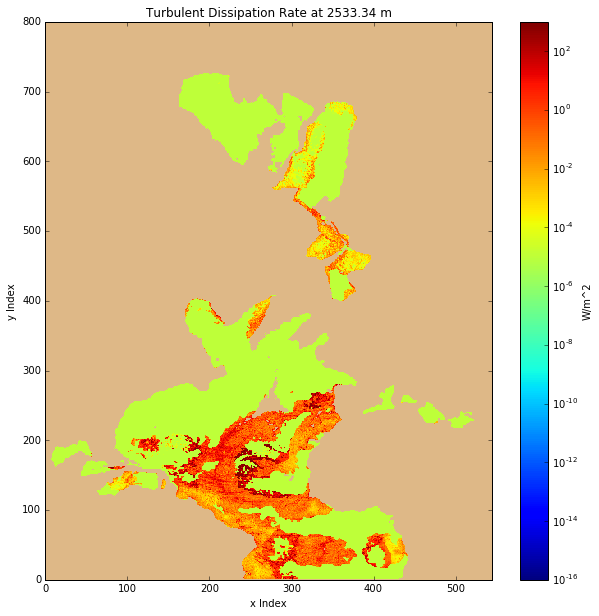

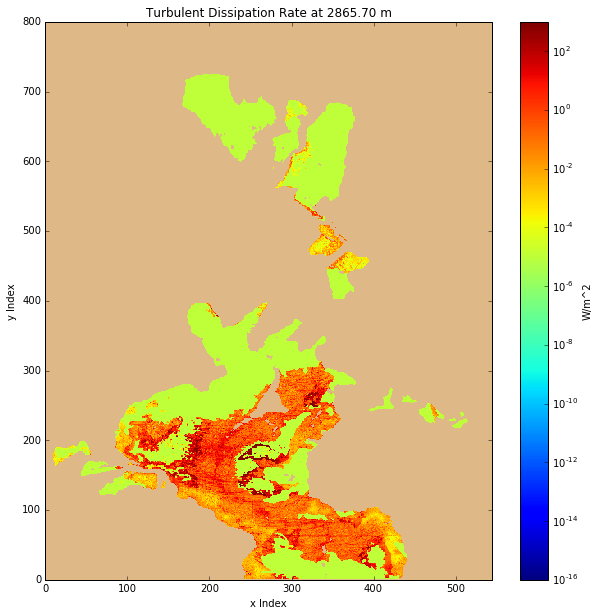

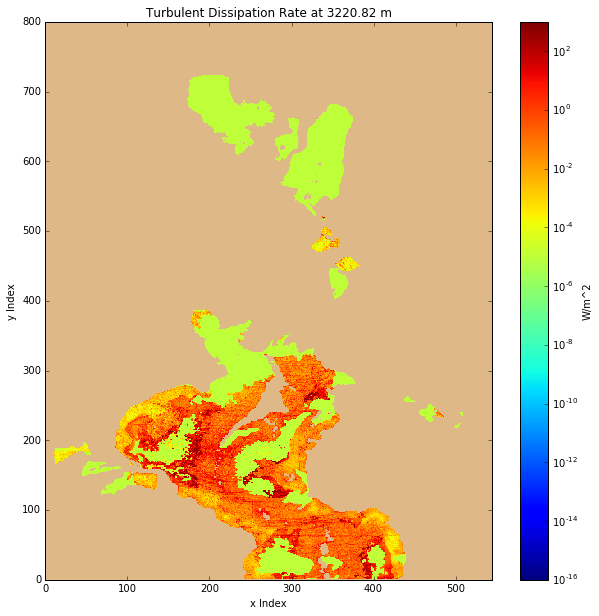

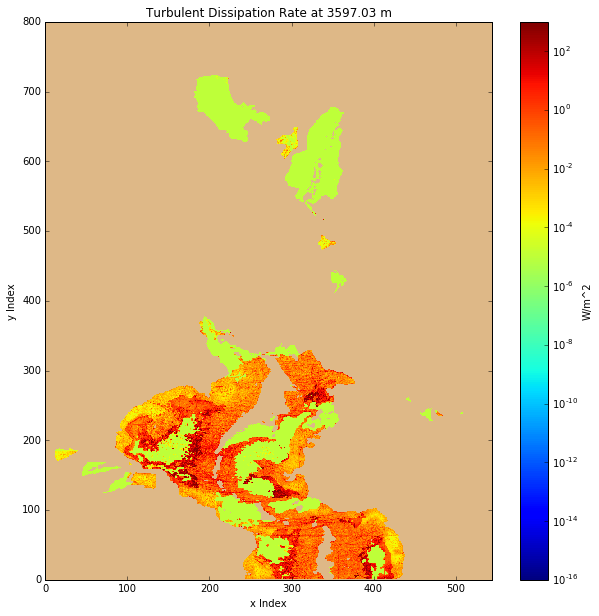

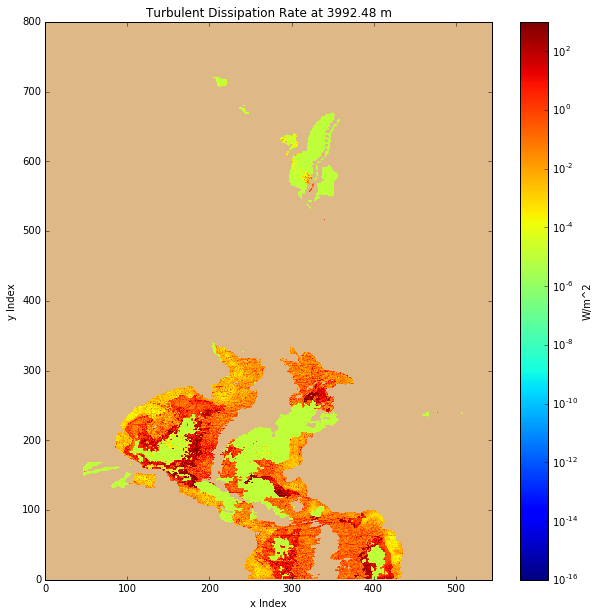

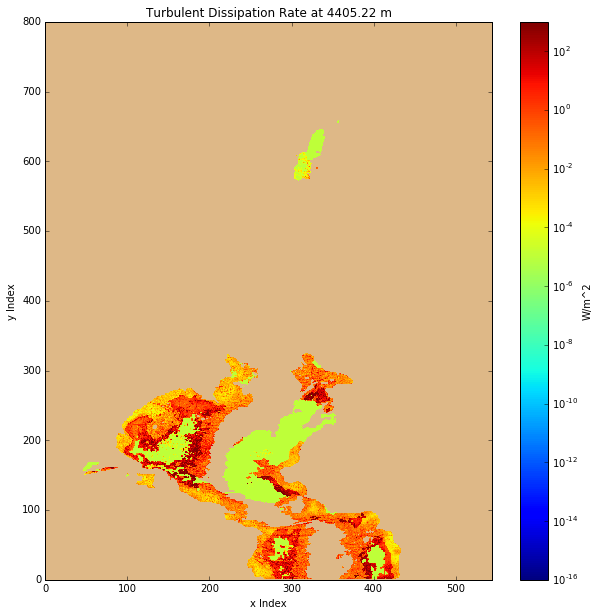

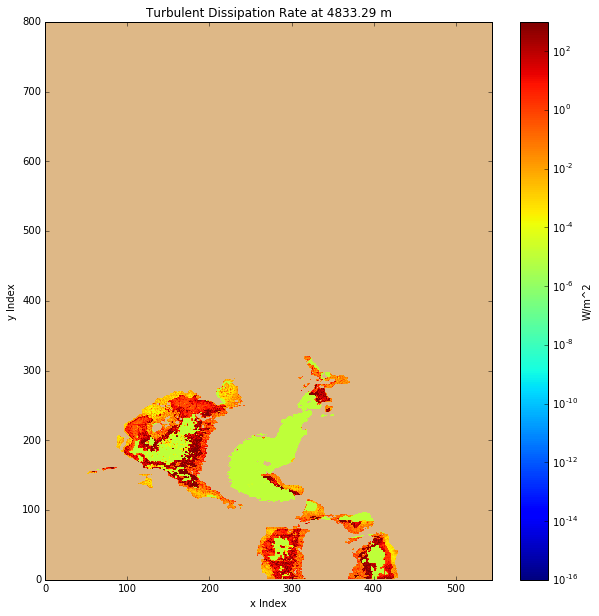

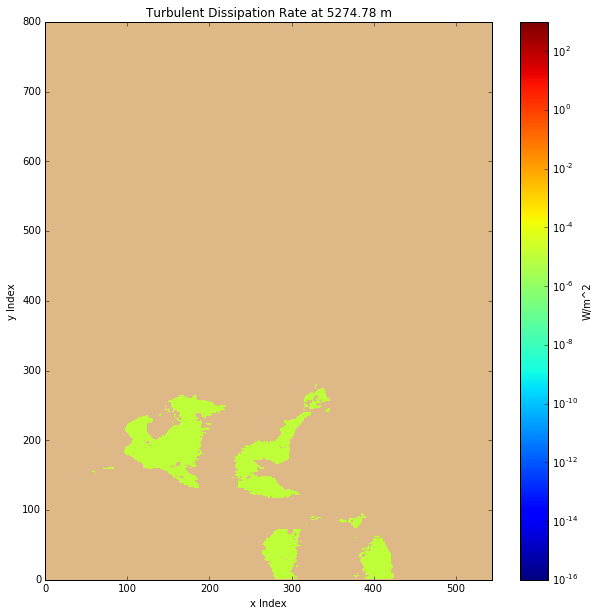

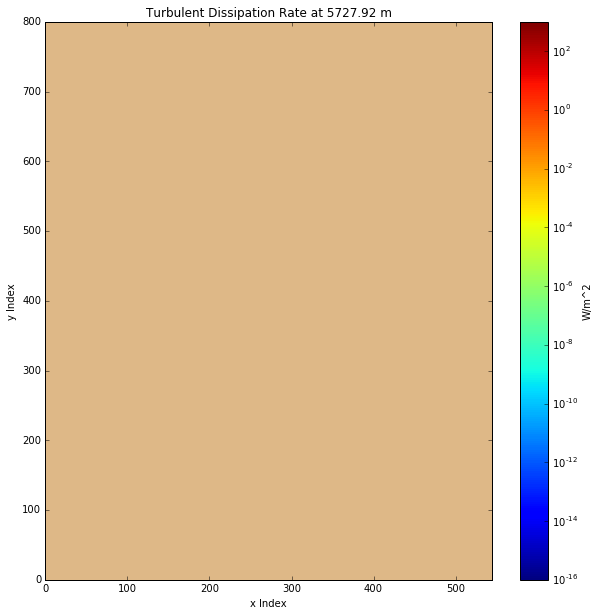

In [16]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('kv_plots.pdf')

for z in np.arange(0,50):
    

    fig, ax = plt.subplots(1,1,figsize=(10,10))
## define colour map
    cmap = plt.get_cmap('jet')

    PLOT_OBJS = make_figure(ax,cmap,depth,k_v,z)

    pp.savefig()

In [17]:
pp.close()

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
## define colour map
cmap = plt.get_cmap('jet')

PLOT_OBJS = make_figure(ax,cmap,depth,k_v,4)

In [ ]:
print(k_v[4,125,215:230])

In [12]:
def plot_base(zlevel,k_v,nav_lat,nav_lon,ax):
    #ved_part = np.ma.masked_values(veddy[zlevel,:,:], 10)
    m = Basemap(projection='mill',llcrnrlat=-20,urcrnrlat=90,
            llcrnrlon=-180,urcrnrlon=180,resolution='l', ax=ax)
    m.drawcoastlines()
    m.fillcontinents(color = '0.85')
    m.drawparallels(np.arange(-80.,90.,10.),labels=[1, 0, 0, 0],color='darkblue',latmax=90)
    m.drawmeridians(np.arange(-180.,180.,10.),labels=[0, 0, 0, 1],color='darkblue',latmax=90)
    x_lon, y_lat = m(nav_lon, nav_lat)
    m = m.pcolor(x_lon[:,:],y_lat[:,:],k_v[zlevel,:,:],norm=colors.LogNorm(vmin=0.1**(-4), vmax=k_v.max()))
    cbar = fig.colorbar(m,ax=ax,shrink=0.8)
    ax.set_xlabel('x Index')
    ax.set_ylabel('y Index')
    #cbar.set_label('{label} [{units}]'.format(label=veddyv.long_name.title(), units=veddyv.units))
    #ax.set_title(u't = {t:.1f} Day, depth \u2248 {d:.2f}{z.units}'.format(t=7, d=zlevels[zlevel], z=zlevels))
    return True

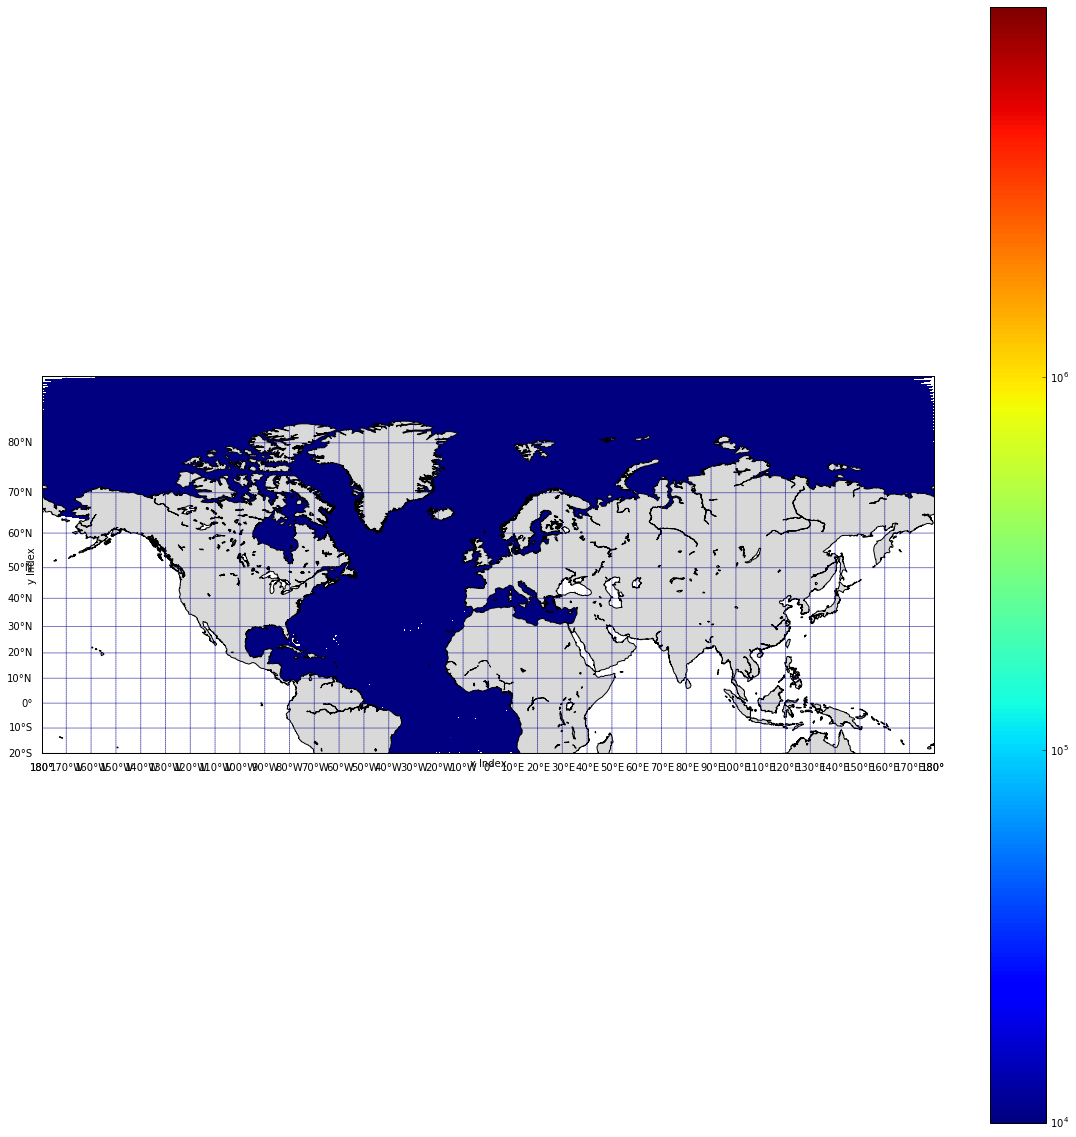

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
## define colour map
cmap = plt.get_cmap('jet')

PLOT_OBJS = plot_base(4,k_v,lat,lon,ax)